In [58]:
import pandas as pd
import matplotlib
import pylab as pl
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Train merged data on first 300 rows of September rows and predict ridership of the remainder in September

### Merged dataset
#### Calculate the regression in September
* Did not remove any stations 
* Selected 300 stations for train

In [59]:
merged = pd.read_csv('../data/processed/master.csv')
merged_norm = pd.read_csv('../data/processed/master_norm.csv')

In [60]:
#dropping all months except September
merged = merged.drop(['ridership_0115', 'ridership_0215', 'ridership_0315', 'ridership_0415', 'ridership_0515', 'ridership_0615', 'ridership_0715', 'ridership_0815', 'ridership_1015', 'ridership_1115', 'ridership_1215'], axis=1)

In [61]:
merged.head()

,station_id,ridership_0915,avg_ridership_2015,bike_lane_score,park,street_quality_score,subway_entrance,tree_score,traffic_volume,median_hh_income,pop_density
0,72,3667.0,2131.615385,0.0,1.0,8.000000,0.0,17.364799,14870.500000,90174.000000,0.000807
1,79,3011.0,1760.538462,3.0,0.0,8.571429,1.0,9.573955,9484.666667,86523.139535,0.000631
2,82,1166.0,766.538462,0.0,1.0,7.333333,0.0,35.070325,16812.500000,73988.000000,0.000511
3,83,1505.0,863.307692,0.0,0.0,7.500000,0.0,0.000000,41976.000000,85199.000000,0.000231
4,116,6558.0,3576.692308,4.0,1.0,8.500000,0.0,47.824344,15948.000000,104974.000000,0.000742


In [62]:
#regress without dropping NA
results = smf.ols('ridership_0915 ~ bike_lane_score + park + street_quality_score + subway_entrance + tree_score + traffic_volume + median_hh_income + pop_density', data=merged).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ridership_0915   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     15.01
Date:                Wed, 16 Nov 2016   Prob (F-statistic):           2.25e-19
Time:                        15:55:43   Log-Likelihood:                -3839.5
No. Observations:                 426   AIC:                             7697.
Df Residuals:                     417   BIC:                             7734.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              152.8324   1092.630      0.140      0.889   -1994.917    2300.582
bike_lane_score        255.1303     58.344      4.373      0.000     140.445     369.816
park                    55.3926    154.598      0.358      0.720    -248.496     359.281
street_quality_score   -46.4576    139.690     -0.333      0.740    -321.043     228.127
subway_entrance       1074.3487    303.004      3.546      0.000     478.744    1669.954
tree_score              -8.6051      4.769     -1.804      0.072     -17.979       0.769
traffic_volume           0.0011      0.008      0.144      0.885      -0.014       0.017
median_hh_income         0.0200      0.003      6.827      0.000       0.014       0.026
pop_density           1.602e+06   3.45e+05      4.646      0.000    9.24e+05    2.28e+06
==============================================================================
Omnibus:                       87.393   Durbin-Watson:                   1.431
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.557
Skew:                           1.097   Prob(JB):                     1.69e-39
Kurtosis:                       5.291   Cond. No.                     3.32e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
merged = merged.dropna()

In [64]:
#regress after dropping NA
results = smf.ols('ridership_0915 ~ bike_lane_score + park + street_quality_score + subway_entrance + tree_score + traffic_volume + median_hh_income + pop_density', data=merged).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ridership_0915   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     15.01
Date:                Wed, 16 Nov 2016   Prob (F-statistic):           2.25e-19
Time:                        15:55:43   Log-Likelihood:                -3839.5
No. Observations:                 426   AIC:                             7697.
Df Residuals:                     417   BIC:                             7734.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              152.8324   1092.630      0.140      0.889   -1994.917    2300.582
bike_lane_score        255.1303     58.344      4.373      0.000     140.445     369.816
park                    55.3926    154.598      0.358      0.720    -248.496     359.281
street_quality_score   -46.4576    139.690     -0.333      0.740    -321.043     228.127
subway_entrance       1074.3487    303.004      3.546      0.000     478.744    1669.954
tree_score              -8.6051      4.769     -1.804      0.072     -17.979       0.769
traffic_volume           0.0011      0.008      0.144      0.885      -0.014       0.017
median_hh_income         0.0200      0.003      6.827      0.000       0.014       0.026
pop_density           1.602e+06   3.45e+05      4.646      0.000    9.24e+05    2.28e+06
==============================================================================
Omnibus:                       87.393   Durbin-Watson:                   1.431
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.557
Skew:                           1.097   Prob(JB):                     1.69e-39
Kurtosis:                       5.291   Cond. No.                     3.32e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
# cross-validation on droppedna
R_IS=[]
R_OS=[]
n=1000
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(merged.iloc[:,[3, 4, 5, 6, 7, 8, 9, 10]], merged.iloc[:,1], train_size=300)
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R-squared for 1000 times is 0.229628866755
OS R-squared for 1000 times is 0.175862884797


(-0.5, 5.5)

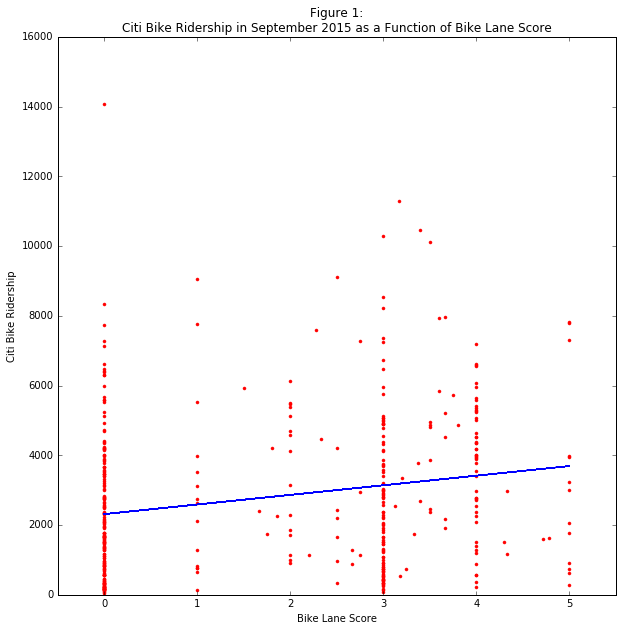

In [66]:
#plot significant explanatory variables
#NA still dropped
results_bl = smf.ols('ridership_0915 ~ bike_lane_score', data=merged).fit()
pl.figure(figsize=(10,10))
pl.plot(merged['bike_lane_score'], merged['ridership_0915'], 'r.')
pl.plot(merged['bike_lane_score'], results_bl.predict(sm.add_constant(merged['bike_lane_score'])), '-')
pl.title('Figure 1:\nCiti Bike Ridership in September 2015 as a Function of Bike Lane Score')
pl.xlabel('Bike Lane Score')
pl.ylabel('Citi Bike Ridership')
pl.xlim(-.5,5.5)

(-0.5, 1.5)

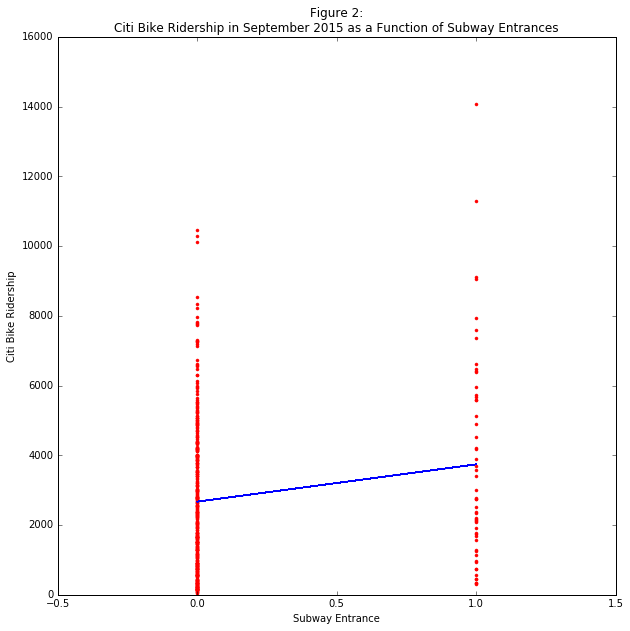

In [67]:
results_se = smf.ols('ridership_0915 ~ subway_entrance', data=merged).fit()
pl.figure(figsize=(10,10))
pl.plot(merged['subway_entrance'], merged['ridership_0915'], 'r.')
pl.plot(merged['subway_entrance'], results_se.predict(sm.add_constant(merged['subway_entrance'])), '-')
pl.title('Figure 2:\nCiti Bike Ridership in September 2015 as a Function of Subway Entrances')
pl.xlabel('Subway Entrance')
pl.ylabel('Citi Bike Ridership')
pl.xlim(-.5,1.5)

(25000, 255000)

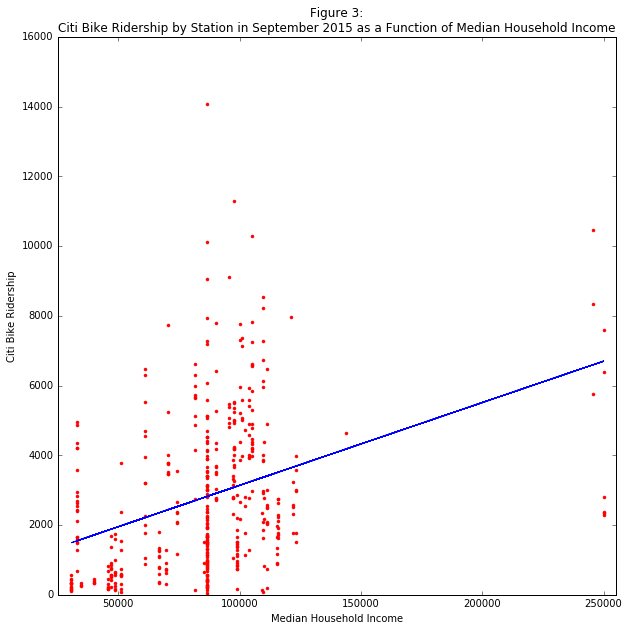

In [68]:
results_hi = smf.ols('ridership_0915 ~ median_hh_income', data=merged).fit()
pl.figure(figsize=(10,10))
pl.plot(merged['median_hh_income'], merged['ridership_0915'], 'r.')
pl.plot(merged['median_hh_income'], results_hi.predict(sm.add_constant(merged['median_hh_income'])), '-')
pl.title('Figure 3:\nCiti Bike Ridership by Station in September 2015 as a Function of Median Household Income')
pl.xlabel('Median Household Income')
pl.ylabel('Citi Bike Ridership')
pl.xlim(25000,255000)

(-0.0001, 0.0016)

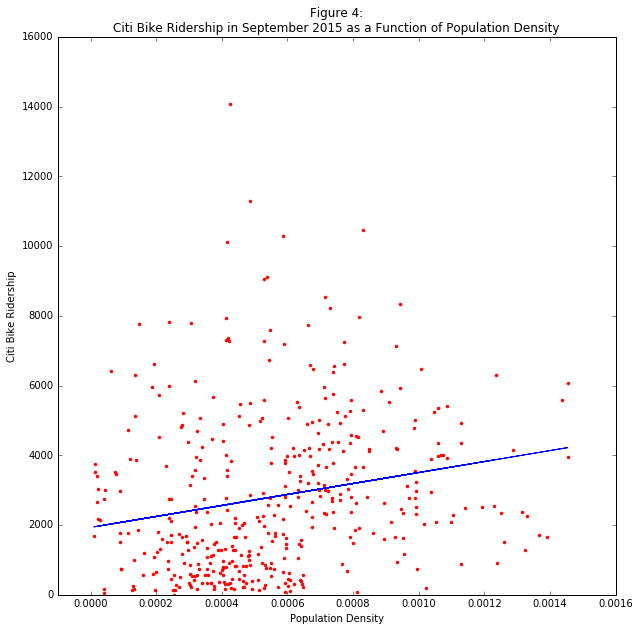

In [69]:
results_pd = smf.ols('ridership_0915 ~ pop_density', data=merged).fit()
pl.figure(figsize=(10,10))
pl.plot(merged['pop_density'], merged['ridership_0915'], 'r.')
pl.plot(merged['pop_density'], results_pd.predict(sm.add_constant(merged['pop_density'])), '-')
pl.title('Figure 4:\nCiti Bike Ridership in September 2015 as a Function of Population Density')
pl.xlabel('Population Density')
pl.ylabel('Citi Bike Ridership')
pl.xlim(-.0001,.0016)

### Captions for Figures 1 - 4
Each plot is a scatter represntation of a count of Citi Bike ridership from each active station in September 2015 as a function of the four statistically significant explanatory variables.  Variables 'subway entrance' and 'park' are binary, with a zero indicating that there was no subway or park within the buffer zone of the Citi Bike station, or a one, indicating that these features were there.  

In [70]:
#conduct analysis with isolated ridership for weekends in September
wknds = pd.read_csv('../data/processed/sept-wknds.csv')
wknds = wknds.drop('Unnamed: 0', axis=1)
wknds = wknds.rename(columns={'start station id': 'station_id', 'tripduration': 'sept_wkndcounts'})
wknds.head()

,station_id,sept_wkndcounts
0,72,893
1,79,598
2,82,262
3,83,519
4,116,1212


In [71]:
merged = merged.drop(['avg_ridership_2015', 'ridership_0915'], axis=1)
wkndmrg = pd.merge(merged, wknds, on='station_id', how='outer')
wkndmrg = wkndmrg.dropna()
wkndmrg.head()

,station_id,bike_lane_score,park,street_quality_score,subway_entrance,tree_score,traffic_volume,median_hh_income,pop_density,sept_wkndcounts
0,72,0.0,1.0,8.000000,0.0,17.364799,14870.500000,90174.000000,0.000807,893.0
1,79,3.0,0.0,8.571429,1.0,9.573955,9484.666667,86523.139535,0.000631,598.0
2,82,0.0,1.0,7.333333,0.0,35.070325,16812.500000,73988.000000,0.000511,262.0
3,83,0.0,0.0,7.500000,0.0,0.000000,41976.000000,85199.000000,0.000231,519.0
4,116,4.0,1.0,8.500000,0.0,47.824344,15948.000000,104974.000000,0.000742,1212.0


In [72]:
#regress after dropping NA
results_wknd = smf.ols('sept_wkndcounts ~ bike_lane_score + park + street_quality_score + subway_entrance + tree_score + traffic_volume + median_hh_income + pop_density', data=wkndmrg).fit()
results_wknd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        sept_wkndcounts   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     16.92
Date:                Wed, 16 Nov 2016   Prob (F-statistic):           9.15e-22
Time:                        15:55:50   Log-Likelihood:                -3177.3
No. Observations:                 421   AIC:                             6373.
Df Residuals:                     412   BIC:                             6409.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -158.8738    256.688     -0.619      0.536    -663.455     345.708
bike_lane_score         74.9617     13.526      5.542      0.000      48.372     101.551
park                    93.9931     35.773      2.627      0.009      23.673     164.313
street_quality_score     3.0267     32.770      0.092      0.926     -61.391      67.444
subway_entrance        180.2052     70.042      2.573      0.010      42.521     317.889
tree_score               0.0460      1.113      0.041      0.967      -2.142       2.234
traffic_volume          -0.0008      0.002     -0.449      0.654      -0.004       0.003
median_hh_income         0.0047      0.001      6.872      0.000       0.003       0.006
pop_density           3.842e+05   8.03e+04      4.784      0.000    2.26e+05    5.42e+05
==============================================================================
Omnibus:                       99.072   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.606
Skew:                           1.211   Prob(JB):                     2.06e-48
Kurtosis:                       5.580   Cond. No.                     3.33e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
#cross-validation
R_IS=[]
R_OS=[]
n=1000
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(wkndmrg.iloc[:,[1, 2, 3, 4, 5, 6, 7, 8]], wkndmrg.iloc[:,9], train_size=300)
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R-squared for 1000 times is 0.252557396064
OS R-squared for 1000 times is 0.190380759174


(-0.5, 5.5)

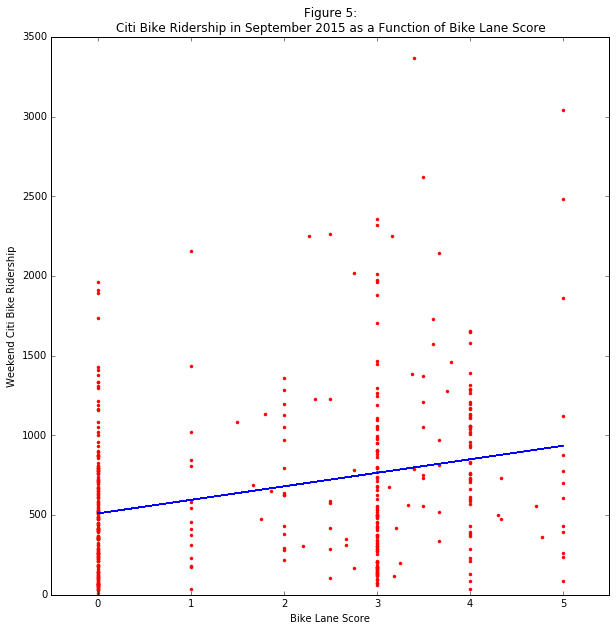

In [79]:
#plot significant explanatory variables
#NA still dropped
results_wknd_bl = smf.ols('sept_wkndcounts ~ bike_lane_score', data=wkndmrg).fit()
pl.figure(figsize=(10,10))
pl.plot(wkndmrg['bike_lane_score'], wkndmrg['sept_wkndcounts'], 'r.')
pl.plot(wkndmrg['bike_lane_score'], results_wknd_bl.predict(sm.add_constant(wkndmrg['bike_lane_score'])), '-')
pl.title('Figure 5:\nCiti Bike Ridership in September 2015 as a Function of Bike Lane Score')
pl.xlabel('Bike Lane Score')
pl.ylabel('Weekend Citi Bike Ridership')
pl.xlim(-.5,5.5)

(-0.5, 3.5)

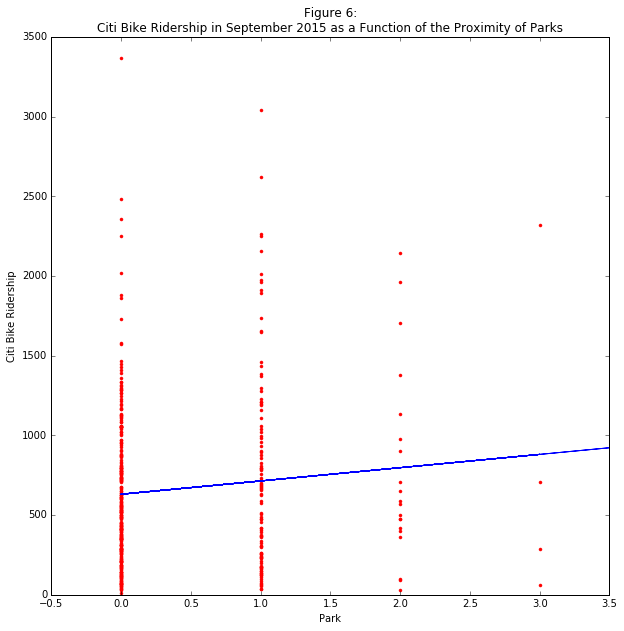

In [87]:
results_se = smf.ols('sept_wkndcounts ~ park', data=wkndmrg).fit()
pl.figure(figsize=(10,10))
pl.plot(wkndmrg['park'], wkndmrg['sept_wkndcounts'], 'r.')
pl.plot(wkndmrg['park'], results_se.predict(sm.add_constant(wkndmrg['park'])), '-')
pl.title('Figure 6:\nCiti Bike Ridership in September 2015 as a Function of the Proximity of Parks')
pl.xlabel('Park')
pl.ylabel('Citi Bike Ridership')
pl.xlim(-.5,3.5)

In [ ]:
# NEED TO FINISH FIGURES 7 AND 8

In [ ]:
results_se = smf.ols('ridership_0915 ~ subway_entrance', data=merged).fit()
pl.figure(figsize=(10,10))
pl.plot(merged['subway_entrance'], merged['ridership_0915'], 'r.')
pl.plot(merged['subway_entrance'], results_se.predict(sm.add_constant(merged['subway_entrance'])), '-')
pl.title('Figure 2:\nCiti Bike Ridership in September 2015 as a Function of Subway Entrances')
pl.xlabel('Subway Entrance')
pl.ylabel('Citi Bike Ridership')
pl.xlim(-.5,1.5)

In [ ]:
wkndmrg.plot(kind='scatter', x='pop_density', y='sept_wkndcounts')

In [ ]:

age = pd.read_csv('../data/processed/age.csv')
age = age.rename(columns={'Station_id': 'station_id'})
age = age.rename(columns={'Median Age': 'median_age'})

wkndmrg = pd.merge(wkndmrg,  age, on='station_id', how='outer')

### Merged_norm dataset
#### Calculate regression on weekend days in September
* Did not remove any stations
* Selected the first 300 stations for train

In [ ]:
merged_norm = merged_norm.drop(['ridership_0115', 'ridership_0215', 'ridership_0315', 'ridership_0415', 'ridership_0515', 'ridership_0615', 'ridership_0715', 'ridership_0815', 'ridership_0915', 'ridership_1015', 'ridership_1115', 'ridership_1215'], axis=1)

In [ ]:
wkndmrg_norm = pd.merge(merged_norm, wknds, on='station_id', how='outer')

In [ ]:
wkndmrg_norm.head()

In [ ]:
results_norm = smf.ols('sept_wkndcounts ~ bike_lane_score + park + street_quality_score + subway_entrance + tree_score + traffic_volume + median_hh_income + pop_density', data=wkndmrg_norm).fit()
results_norm.summary()

In [ ]:
merged_norm.cov()

In [ ]:
wkndmrg_norm = wkndmrg.dropna()

In [ ]:
# test data on all variables
R_IS=[]
R_OS=[]
n=1000
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(wkndmrg_norm.iloc[:,[2, 3, 4, 5, 6, 7, 8, 9]], wkndmrg_norm.iloc[:,10], train_size=300)
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

### Merged_norm
#### Calculate regression on all days in September:
* Did not remove any stations 
* Selected first 300 stations for train

In [ ]:
merged_norm = pd.read_csv('../data/processed/master_norm.csv')
merged_norm = merged_norm.drop(['ridership_0115', 'ridership_0215', 'ridership_0315', 'ridership_0415', 'ridership_0515', 'ridership_0615', 'ridership_0715', 'ridership_0815', 'ridership_1015', 'ridership_1115', 'ridership_1215'], axis=1)

In [ ]:
merged_norm.head()

In [ ]:
merged_norm.iloc[:,3:].cov()

In [ ]:
results_norm = smf.ols('ridership_0915 ~ bike_lane_score + park + street_quality_score + subway_entrance + tree_score + traffic_volume + median_hh_income + pop_density', data=merged_norm).fit()
results_norm.summary()

In [ ]:
merged_norm = merged_norm.dropna()

In [ ]:
# test data on all variables
R_IS=[]
R_OS=[]
n=1000
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(merged_norm.iloc[:,3:], merged_norm.iloc[:,1], train_size=300)
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

#### Notes
* multicollinearity exists when one of the explanatory variables has a linear relationship with another or a combination of others
* multicollinearity icnreases standard error and uncertainty in regression coefficient estimates
* results in lower significances in the coefficient estimates and larger confidence intervals
* impossible to differentiate between the effects of explanatory variables when they covary
* can use pearsons r for bivariate correlations
* r values close to 1 or -1 indicate high correlative values
* threshold values for r vary from study to study based on sample size

In [ ]:
#zips_stations = pd.read_csv('../data/processed/zips_stations.csv')
#borough = {10026: 'Manhattan', 10027: 'Manhattan', 10030: 'Manhattan', 10037: 'Manhattan', 10039: 'Manhattan', 10001: 'Manhattan', 10011: 'Manhattan', 10018: 'Manhattan', 10019: 'Manhattan', 10020: 'Manhattan', 10036: 'Manhattan', 10029: 'Manhattan', 10035: 'Manhattan', 10010: 'Manhattan', 10016: 'Manhattan', 10017: 'Manhattan', 10022: 'Manhattan', 10012: 'Manhattan', 10013: 'Manhattan', 10014: 'Manhattan', 10004: 'Manhattan', 10005: 'Manhattan', 10006: 'Manhattan', 10007: 'Manhattan', 10038: 'Manhattan', 10280: 'Manhattan', 10002: 'Manhattan', 10003: 'Manhattan', 10009: 'Manhattan', 10021: 'Manhattan', 10028: 'Manhattan', 10044: 'Manhattan', 10065: 'Manhattan', 10075: 'Manhattan', 10128: 'Manhattan', 10023: 'Manhattan', 10024: 'Manhattan', 10025: 'Manhattan', 10031: 'Manhattan', 10032: 'Manhattan', 10033: 'Manhattan', 10034: 'Manhattan', 10040: 'Manhattan'}
#zips_stations['Borough'] = zips_stations['Zip_Code'].map(borough)
#zips_stations = zips_stations.rename(columns={'Station_id': 'station_id'})
#zips_stations.head()
#merged = pd.merge(zips_stations, merged, on='station_id', how='outer')
#merged = merged.dropna()
#merged.head()